# 1. Importing data from the Internet
**The web is a rich source of data from which you can extract various types of insights and findings. In this chapter, you will learn how to get data from the web, whether it is stored in files or in HTML. You'll also learn the basics of scraping and parsing web data.**

## Importing flat files from the web
### Is it possible to import web data?
- You can: go to URL and click to download files
- BUT: not reproducible, not scalable

### The urllib package
- Provides interface for fetching data across the web
- `urlopen()` - accepts URLs instead of file names

### How to automate file download in Python
```python
from urllib.request import urlretrieve
url = 'http://www.website.com/example-link/example_file.csv'
urlretrieve(url, 'example_file.csv')
```
```
('example_file.csv', <http.client.HTTPMessage at 0x103cf1128>)
```

## Importing flat files from the web: your turn
The flat file you will import will be `'winequality-red.csv'` from the University of California, Irvine's [Machine Learning repository](http://archive.ics.uci.edu/ml/index.html). The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is
```
'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```
After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a `pandas` DataFrame.

- Import the function `urlretrieve` from the subpackage `urllib.request`.
- Assign the URL of the file to the variable `url`.
- Use the function `urlretrieve()` to save the file locally as `'winequality-red.csv'`.
- Execute the remaining code to load `'winequality-red.csv'` in a pandas DataFrame and to view its head to the shell.

In [2]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and view its head
df = pd.read_csv('winequality-red.csv', sep=';')
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Opening and reading flat files from the web
You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using `pandas`. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator `sep` as the second argument.

The URL of the file, once again, is
```
'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```

- Assign the URL of the file to the variable `url`.
- Read file into a DataFrame `df` using `pd.read_csv()`, recalling that the separator in the file is `';'`.
- View the head of the DataFrame `df`.
- Execute the rest of the code to plot histogram of the first feature in the DataFrame `df`.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


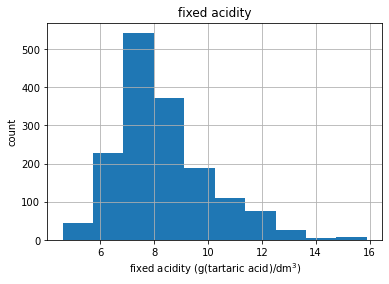

In [6]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# View the head of the DataFrame
display(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


## Importing non-flat files from the web
Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the `pandas` function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

The URL of the spreadsheet is
```
'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
```
Your job is to use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet *using its name, not its index*.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

- Assign the URL of the file to the variable `url`.
- Read the file in `url` into a dictionary `xls` using `pd.read_excel()` recalling that, in order to import all sheets you need to pass `None` to the argument `sheet_name`.
- Print the names of the sheets in the Excel spreadsheet; these will be the keys of the dictionary `xls`.
- View the head of the first sheet using the sheet name, not the index of the sheet! The sheet name is `'1700'`

In [8]:
# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames
print(xls.keys())

# View the head of the first sheet (using its name, NOT its index)
display(xls['1700'].head())


dict_keys(['1700', '1900'])


,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


---

## HTTP requests to import files from the web
### URL
- Uniform/Universal Resource Locator
- References to web resources
- Focus: web addresses
- Ingredients:
    - Protocol identifier - http:
    - Resource name - webpage.com
- These specify web addresses uniquely

### HTTP
- HyperText Transfer Protocol
- Foundation of data communication for the web
- HTTPS - more secure form of HTTP
- Going to a website = sending HTTP request
    - GET request
- `urlretrieve()` performs a GET request
- HTML - HyperText Markup Language

### GET requests using urllib
```python
from urllib.request import urlopen, Request
url = "https://www.website.com/"
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()
```

### GET requests using requests
 According to the requests package website. *"Requests allows you to send organic, grass-fed HTTP/1 dot 1 requests, without the need for manual labor."* and the following organizations claim to use requests internally: *"Her Majesty's Government, Amazon, Google, Twilio, NPR, Obama for America, Twitter, Sony, and Federal U.S. Institutions that prefer to be unnamed."*

- One of the most downloaded Python packages

```python
import requests
url = "https://www.website.com/"
r = requests.get(url)
text = r.text
```

## Performing HTTP requests in Python using urllib
Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from `"https://campus.datacamp.com/courses/1606/4135?ex=2".`

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

- Import the functions `urlopen` and `Request` from the subpackage `urllib.request`.
- Package the request to the url `"https://campus.datacamp.com/courses/1606/4135?ex=2"` using the function `Request()` and assign it to `request`.
- Send the request and catch the response in the variable `response` with the function `urlopen()`.
- Run the rest of the code to see the datatype of `response` and to close the connection!

In [12]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Close the response
response.close()


<class 'http.client.HTTPResponse'>


## Printing HTTP request results in Python using urllib
You have just packaged and sent a GET request to `"https://campus.datacamp.com/courses/1606/4135?ex=2"` and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could *read* it to extract the HTML and, in fact, such a `http.client.HTTPResponse` object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

- Send the request and catch the response in the variable `response` with the function `urlopen()`, as in the previous exercise.
- Extract the response using the `read()` method and store the result in the variable `html`.
- Print the string `html`.

In [17]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html[:1000])

# Close the response
response.close()

b'<!doctype html><html lang="en"><head><link rel="apple-touch-icon-precomposed" sizes="57x57" href="/apple-touch-icon-57x57.png"><link rel="apple-touch-icon-precomposed" sizes="114x114" href="/apple-touch-icon-114x114.png"><link rel="apple-touch-icon-precomposed" sizes="72x72" href="/apple-touch-icon-72x72.png"><link rel="apple-touch-icon-precomposed" sizes="144x144" href="/apple-touch-icon-144x144.png"><link rel="apple-touch-icon-precomposed" sizes="60x60" href="/apple-touch-icon-60x60.png"><link rel="apple-touch-icon-precomposed" sizes="120x120" href="/apple-touch-icon-120x120.png"><link rel="apple-touch-icon-precomposed" sizes="76x76" href="/apple-touch-icon-76x76.png"><link rel="apple-touch-icon-precomposed" sizes="152x152" href="/apple-touch-icon-152x152.png"><link rel="icon" type="image/png" href="/favicon.ico"><link rel="icon" type="image/png" href="/favicon-196x196.png" sizes="196x196"><link rel="icon" type="image/png" href="/favicon-96x96.png" sizes="96x96"><link rel="icon" ty

## Performing HTTP requests in Python using requests
Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their `"http://www.datacamp.com/teach/documentation"` page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests.

- Import the package `requests`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the `text` attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable `text`.
- Print the HTML of the webpage.

In [29]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text[:2035])

<!DOCTYPE HTML>
<html lang="en-US">
<head>
  <meta charset="UTF-8" />
  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
  <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
  <meta name="robots" content="noindex, nofollow" />
  <meta name="viewport" content="width=device-width,initial-scale=1" />
  <title>Just a moment...</title>
  <style type="text/css">
    html, body {width: 100%; height: 100%; margin: 0; padding: 0;}
    body {background-color: #ffffff; color: #000000; font-family:-apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", Roboto, Oxygen, Ubuntu, "Helvetica Neue",Arial, sans-serif; font-size: 16px; line-height: 1.7em;-webkit-font-smoothing: antialiased;}
    h1 { text-align: center; font-weight:700; margin: 16px 0; font-size: 32px; color:#000000; line-height: 1.25;}
    p {font-size: 20px; font-weight: 400; margin: 8px 0;}
    p, .attribution, {text-align: center;}
    #spinner {margin: 0 auto 30px auto; display: block;}
    .attri

---

## Scraping the web in Python
### HTML
- Mix of unstructured and structured data
- Structured data:
    - Has pre-defined data model, or
    - Organized in a defined manner
- Unstructured data: neither of these properties

### BeautifulSoup
- Parse and extract structured data from HTML
- Make tag soup beautiful and extract information

In [30]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

### Prettified Soup
```python
print(soup.prettify())
```

### Exploring BeautifulSoup
- Many methods such as:

In [36]:
print(soup.title)

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>


In [37]:
print(soup.get_text())




Beautiful Soup: We called him Tortoise because he taught us.









[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup ca

- `find_all()`

In [38]:
for link in soup.find_all('a'):
    print(link.get('href'))

#Download
bs4/doc/
#HallOfFame
enterprise.html
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
bs4/download/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.2.tar.gz
https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website
None
http://www.nytimes.co

## Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the BeautifulSoup package to *parse*, *prettify* and *extract* information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own [Benevolent Dictator for Life](https://en.wikipedia.org/wiki/Benevolent_dictator_for_life). In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is `url = 'https://www.python.org/~guido/'`.

- Import the function `BeautifulSoup` from the package `bs4`.
- Assign the URL of interest to the variable `url`.
- Package the request to the URL, send the request and catch the response with a single function `requests.get()`, assigning the response to the variable `r`.
- Use the `text` attribute of the object `r` to return the HTML of the webpage as a string; store the result in a variable `html_doc`.
- Create a BeautifulSoup object `soup` from the resulting HTML using the function `BeautifulSoup()`.
- Use the method `prettify()` on `soup` and assign the result to `pretty_soup`.
- Print to prettified HTML to your shell!

In [41]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Public

## Turning a webpage into data using BeautifulSoup: getting the text
In the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

- In the sample code, the HTML response object `html_doc` has already been created: your first task is to Soupify it using the function `BeautifulSoup()` and to assign the resulting soup to the variable soup.
- Extract the title from the HTML soup `soup` using the attribute `title` and assign the result to `guido_title`.
- Print the title of Guido's webpage.

In [43]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage
print(guido_title)

<title>Guido's Personal Home Page</title>


- Extract the text from the HTML soup `soup` using the method `get_text()` and assign to `guido_text`.
- Print the text from Guido's webpage.

In [44]:
# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text)



Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "loch".  (Listen to the
sound clip.

## Turning a webpage into data using BeautifulSoup: getting the hyperlinks
In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

In [45]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

<title>Guido's Personal Home Page</title>


- Use the method `find_all()` to find all hyperlinks in `soup`, remembering that hyperlinks are defined by the HTML tag `<a>` but passed to `find_all()` without angle brackets; store the result in the variable `a_tags`.
- The variable `a_tags` is a results set: your job now is to enumerate over it, using a `for` loop and to print the actual URLs of the hyperlinks; to do this, for every element `link` in `a_tags`, you want to `print()` `link.get('href')`.

In [47]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif
